<a href="https://colab.research.google.com/github/lindseyhuppin/Neur265Work/blob/main/homework/coding_homework_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Coding Homework #4

**Instructions**

1. Make a *Markdown Cell* that contains the following information:
- Your name (small header)
- The name of this class (italicized)
- The date (bolded)

2. Create a *Code Cell* that imports relevant modules - specifically, <code>pandas as pd</code>, <code>matplotlib.pyplot as plt</code>, and <code>scipy.stats as stats</code>.

3. For this assignment, you'll be using the <code>patch_seq_expanded.csv</code> file located in our class GitHub repo. Create a *Code Cell* that loads this file in as a <code>Pandas dataFrame</code> called <code>patch_seq</code>.

4. In a new *Code Cell*, using the <code>df.plot</code> method from the <code>pandas</code> module, make a bar graph that displays the value counts (how many observations) from the "Marker" column of your <code>patch_seq</code> variable. Label your x and y-axes.

5. In a new *Code Cell*, repeat step 4, but make a pie chart instead of a bar graph.

6. In a new *Code Cell*, use a <code>for</code> loop to make a scatter plot of the "ISI" (on the x-axis) and "Fast_Trough" (on the y-axis) values in your <code>patch_seq</code> dataframe. Your loop should make data points from "Sst" neurons <font color = 'red'>red</font>, and data points from "Pvalb" neurons <font color = 'blue'>blue</font>.

7. In a new *Code Cell*, create a <code>function</code> called <code>patchScatter()</code> that will output the scatter plot created in step 6 when you call it. Don't forget to tell it to show your scatter plot!

8. In a new *Code Cell*, return the mean, standard deviation, and range of the "Fast_Trough" column for "Sst" neurons and "Pvalb" neurons. You can do this with the <code>pandas</code> method <code>describe</code>, like so:

<code>patch_seq.groupby('Marker')['Fast_Trough'].describe()</code>

9. In a new *Markdown Cell*, describe the difference in means between "Sst" neurons and "Pvalb" neurons. Which group has a more negative undershoot following an action potential?

10. In a new *Code Cell*, return the skewness of the "Fast_Trough" column for "Sst" neurons and "Pvalb" neurons. You can do this with the <code>pandas</code> method <code>skew</code> (follow the syntax in step 8 to apply this method to <code>patch_seq</code>).

11. In a new *Markdown Cell*, interpret the results of your skewness test. Generally, values >0.5, or <-0.5, indicate a skewed distribution, while values between -0.5 and 0.5 indicate a normal distribution.

12. In a new *Code Cell*, repeat step 10 for the "ISI" column of <code>patch_seq</code>.

13. In a new *Markdown Cell*, repeat step 11 for the "ISI" column of <code>patch_seq</code>.

14. Finally, in a new *Code Cell*, let's perform a t-test to see if our "Fast_Trough" and "ISI" values differ between "Sst" and "Pvalb" neurons. To do this for our "Fast_Trough" values, we should first isolate each group and make each of them into a separate variable. An example of how to do this for "Sst" neurons is below:

<code>sst_neurons = patch_seq[patch_seq['Marker']=='Sst']</code>

Use the same code to create another variable called <code>pvalb_neurons</code>. Once you've made your two variables, perform an independent-samples t-test to compare "Fast_Trough" values between the two groups:

<code>stats.ttest_ind(sst_neurons['Fast_Trough'], pvalb_neurons['Fast_Trough'])</code>.

15. In a *Markdown Cell*, describe the results of your t-test. Does the undershoot voltage significantly differ betwen the two groups?

16. In a new *Code Cell*, repeat step 14 for "ISI". You won't need to create new <code>sst_neurons</code> and <code>pvalb_neurons</code> variables - you'll just need to run a new t-test.

17. In a new *Markdown Cell*, repeat step 15 for the results of your new t-test.

18. Make sure to put a <code>#</code> in each *Code Cell* to describe what it does.

19. Save a copy of this notebook to your GitHub repo with the title <code>coding_homework_4.ipynb</code>.




##Lindsey Huppin
*Intro to Neural Data Analysis*

**3/8/24**

In [65]:
#2 importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

In [66]:
#3 importing patch seq data
patch_seq = pd.read_csv('https://raw.githubusercontent.com/hallockh/neur_265/main/data/patch_seq_expanded.csv')

Text(0, 0.5, 'Count')

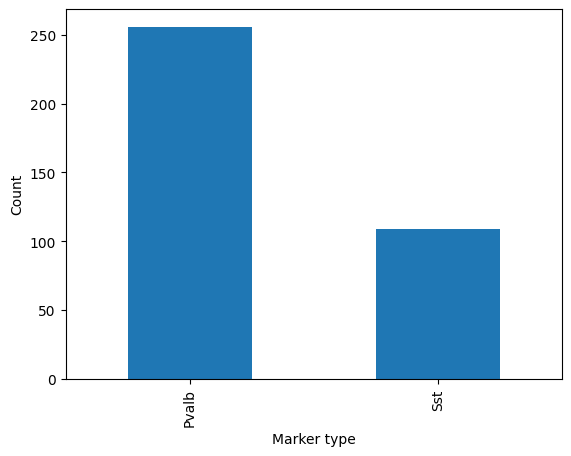

In [67]:
#4 graphing a bar graph of the counts
patch_seq['Marker'].value_counts().plot(kind = 'bar')
plt.xlabel('Marker type')
plt.ylabel('Count')

<Axes: ylabel='Marker'>

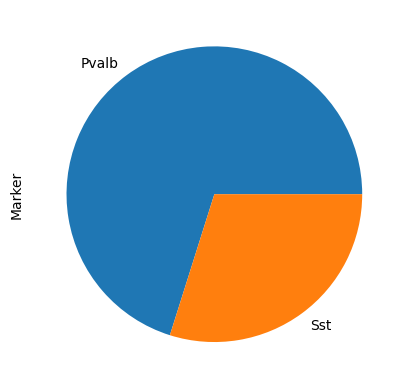

In [68]:
#5 pie chart of counts
patch_seq['Marker'].value_counts().plot(kind = 'pie')

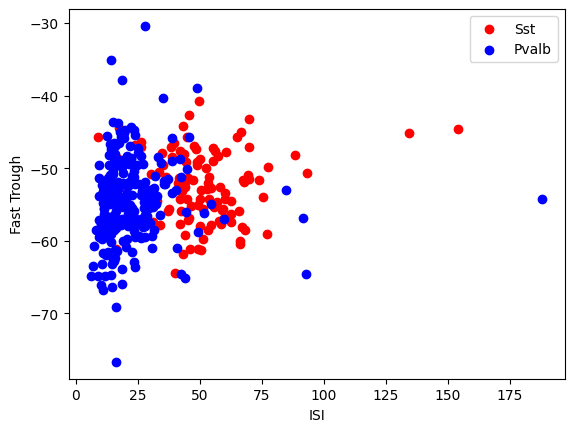

In [69]:
#6 scatterplot of ISI and fast trough values
sst_bool = True
pvalb_bool = True
for i in range(len(patch_seq)):
  if patch_seq.iloc[i,2] == 'Sst':
    if(sst_bool):
      plt.scatter(patch_seq.iloc[i,0],patch_seq.iloc[i,1],color = 'r', label = "Sst")
      sst_bool = False
      continue
    plt.scatter(patch_seq.iloc[i,0],patch_seq.iloc[i,1],color = 'r')
  else:
    if(pvalb_bool):
      plt.scatter(patch_seq.iloc[i,0],patch_seq.iloc[i,1],color = 'b', label = "Pvalb")
      pvalb_bool = False
      continue
    plt.scatter(patch_seq.iloc[i,0],patch_seq.iloc[i,1], color = 'b')
plt.xlabel('ISI')
plt.ylabel('Fast Trough')
plt.legend()
plt.show()

In [70]:
#7 function creating a scatterplot
def patchScatter(patch_seq):
  sst_bool = True
  pvalb_bool = True
  for i in range(len(patch_seq)):
    if patch_seq.iloc[i,2] == 'Sst':
      if(sst_bool):
        plt.scatter(patch_seq.iloc[i,0],patch_seq.iloc[i,1],color = 'r', label = "Sst")
        sst_bool = False
        continue
      plt.scatter(patch_seq.iloc[i,0],patch_seq.iloc[i,1],color = 'r')
    else:
      if(pvalb_bool):
        plt.scatter(patch_seq.iloc[i,0],patch_seq.iloc[i,1],color = 'b', label = "Pvalb")
        pvalb_bool = False
        continue
      plt.scatter(patch_seq.iloc[i,0],patch_seq.iloc[i,1], color = 'b')
  plt.xlabel('ISI')
  plt.ylabel('Fast Trough')
  plt.legend()
  plt.show()

In [71]:
#8 providing the mean, sd, and range of the data
patch_seq.groupby('Marker')['Fast_Trough'].describe()

,count,mean,std,min,25%,50%,75%,max
Marker,,,,,,,,
Pvalb,256.0,-54.548074,5.870670,-76.687508,-57.914063,-54.490629,-51.364065,-30.406252
Sst,109.0,-52.514968,4.958103,-64.375008,-55.931252,-52.568752,-48.500000,-40.781254


###9
The pvalb neurons on average have a more negative undershoot than the sst neurons. However, the pvalb neurons have the highest undershoot as well since the max of the pvalb is greater than the max of the sst neurons. The pvalb neurons have much more data available than the sst neurons. The pvalb neurons have more variablility in their undershoot values since their standard deviation is greater than the sst neurons.

In [72]:
#10 showing the level of skew of sst and pvalb neurons for fast trough
patch_seq.groupby('Marker')['Fast_Trough'].skew()

Marker
Pvalb    0.19536
Sst      0.00125
Name: Fast_Trough, dtype: float64

###11
Neither of these values indicate the data is skewed. Both the pvalb and sst skews are less than .5 and greater than -.5. However, the sst values are closer to normal distribution than the pvalb neurons because the skew value is higher, although still normally distributed, for the pvalb than the sst.

In [73]:
#12 showing the level of skew of sst and pvalb neurons for ISI
patch_seq.groupby('Marker')['ISI'].skew()

Marker
Pvalb    5.596386
Sst      1.857850
Name: ISI, dtype: float64

###13
Both the pvalb and sst ISI values are skewed since they're greater than .5. The pvalb neurons are more skewed than the sst neurons because the skew value is greater than the sst neurons.

In [74]:
#14 t test between pvalb and sst
sst_neurons = patch_seq[patch_seq['Marker']=='Sst']
pvalb_neurons = patch_seq[patch_seq['Marker']=='Pvalb']
#fast trough
print(stats.ttest_ind(sst_neurons['Fast_Trough'], pvalb_neurons['Fast_Trough']))

TtestResult(statistic=3.1660773376899147, pvalue=0.0016757984214133585, df=363.0)


###15
The undershoot voltage is statistically significantly different between the two types of neurons because the p value is less that .05. The p value of the data is about .0017.

In [75]:
#16 t test between pvalb and sst
sst_neurons = sst_neurons.dropna()
pvalb_neurons = pvalb_neurons.dropna()
#ISI
print(stats.ttest_ind(sst_neurons['ISI'], pvalb_neurons['ISI']))

TtestResult(statistic=14.643966775010774, pvalue=2.694292788633572e-38, df=354.0)


###17
The pvalb and sst neurons are extremely different for the ISI values. The pvalue is significantly less than .05 so the difference in the data is statistically significant.